# Practica 4


Alumno : Garcia De Arcos Jose Angel Eduardo

Escuela : Escuela Superior de Computo - IPN

Materia : Aprendizaje de Maquina

Semestre: 5to Semestre

In [1]:
#Importamos las librerias que necesitemos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from  sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

In [2]:
#Entrenamiento de los datos  basado en 80% entrenamiento y 20 % prueba , asi como una validacion en 10 pliegues
#Definicion de Clases

class validation_set:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

class test_set:
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test

class data_set:
    def __init__(self, validation_set, test_set):
        self.validation_set = validation_set
        self.test_set = test_set


#Definicion de Clase Principal Para los pliegues y  entrenamiento 
pd.options.display.max_colwidth = 200
df = pd.read_csv("C:/Users/Angel/Downloads/cal_housing.csv", sep=',', engine='python')
X = df.drop(columns=['medianHouseValue'],axis = 1).values
y = df['medianHouseValue'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False,random_state=1)
validation_sets = []
kf = KFold(n_splits=10) #Modificar Parametro para obtener los demas pliegues
c=0 
for train_index, test_index in kf.split(X_train):
    c=c+1
    X_train_v, X_test_v = X_train[train_index], X_train[test_index]
    y_train_v, y_test_v = y_train[train_index], y_train[test_index]
    validation_sets.append(validation_set(X_train_v, y_train_v, X_test_v, y_test_v))   
my_test_set = test_set(X_test, y_test)
my_data_set = data_set(validation_sets, my_test_set)    

In [3]:
#Generamos los csv Correspondientes a los plieges que utilizaremos
i = 1
for val_set in my_data_set.validation_set:
    np.savetxt("Data_Validation_Train_Pliegues" + str(i) + ".csv", val_set.X_train, delimiter=",", fmt="%s",header="longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome", comments="")
    np.savetxt("target_Validation_train" + str(i) + ".csv", val_set.y_train, delimiter=",", fmt="%s",header=" medianHouseValue", comments="")
    i = i + 1

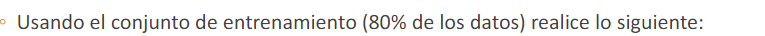
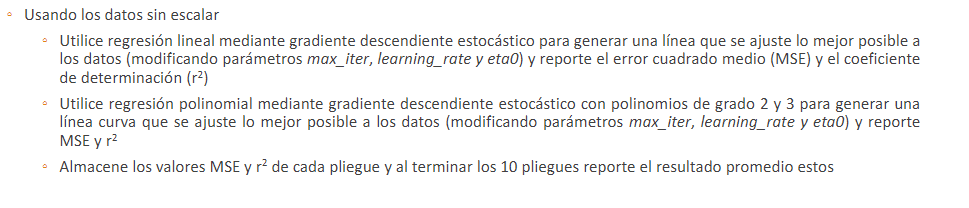


## Regresion Lineal ( Sin Escalar)

In [4]:
mse_list = []
r2_list = []

            0      1     2       3       4       5       6       7  \
0     -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252   
1     -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014   
2     -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574   
3     -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431   
4     -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462   
...       ...    ...   ...     ...     ...     ...     ...     ...   
16507 -121.11  37.74  11.0  3886.0   599.0  1605.0   529.0  4.4213   
16508 -121.10  37.80  35.0  1853.0   331.0   958.0   340.0  3.3578   
16509 -121.11  37.76  22.0  2606.0   411.0  1252.0   397.0  4.1833   
16510 -121.16  37.73   7.0  4956.0   941.0  3006.0   915.0  3.4426   
16511 -121.25  37.76  22.0  2430.0   417.0  1292.0   391.0  3.4009   

                   0  
0      410170.313135  
1      413254.742800  
2      378992.031705  
3      320503.163281  
4      251064.020846  
...              ... 

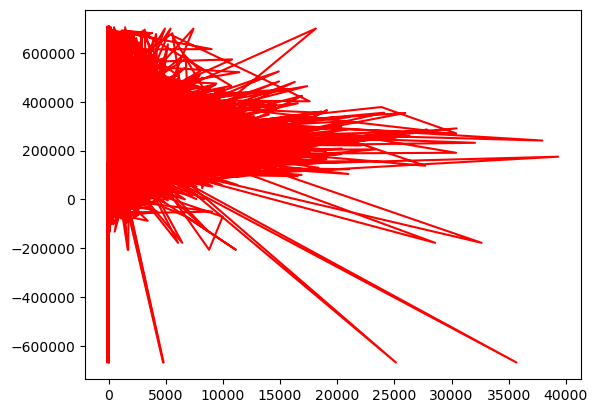

In [5]:
#Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
plt.plot(X_train, y_pred, color='r')
DFy_predict = pd.DataFrame(y_pred)
DFX_train = pd.DataFrame(X_train)
print(pd.concat([DFX_train,DFy_predict], axis=1))

In [6]:
#Calculo del error Cuadrado Medio y R2
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print ('\n Regresión lineal\nmse: {} r2: {}'.format(mse, r2), '\n')
mse_list.append(mse)
r2_list.append(r2)


 Regresión lineal
mse: 4927300548.347079 r2: 0.6176480685177668 



## Regresion Polinomial ( Sin Escalar)
### Grado 2

In [8]:
#Conversión de las variables de la ecuación original a polinomio de grado 2
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
print ('\n x_poly', x_poly)


 x_poly [[ 1.00000000e+00 -1.22230000e+02  3.78800000e+01 ...  1.58760000e+04
   1.04897520e+03  6.93089550e+01]
 [ 1.00000000e+00 -1.22220000e+02  3.78600000e+01 ...  1.29504400e+06
   9.44699320e+03  6.89132420e+01]
 [ 1.00000000e+00 -1.22240000e+02  3.78500000e+01 ...  3.13290000e+04
   1.28455980e+03  5.26698548e+01]
 ...
 [ 1.00000000e+00 -1.21110000e+02  3.77600000e+01 ...  1.57609000e+05
   1.66077010e+03  1.74999989e+01]
 [ 1.00000000e+00 -1.21160000e+02  3.77300000e+01 ...  8.37225000e+05
   3.14997900e+03  1.18514948e+01]
 [ 1.00000000e+00 -1.21250000e+02  3.77600000e+01 ...  1.52881000e+05
   1.32975190e+03  1.15661208e+01]]


In [9]:
# ~ #Modelo de regresión polinomial
model_poly = LinearRegression()
model_poly.fit(x_poly, y_train)
y_poly_pred = model_poly.predict(x_poly)
print('y_poly_pred {}'.format(y_poly_pred))

y_poly_pred [390272.6520679  468600.66443748 385070.02595747 ... 155445.68318596
 133261.84545781 131773.25682712]


In [10]:
# ~ #Cálculo del error cuadrado medio y r2
mse = mean_squared_error(y_train, y_poly_pred)
r2 = r2_score(y_train, y_poly_pred)
mse_list.append(mse)
r2_list.append(r2)


[4927300548.347079, 3936172988.2384295]
[0.6176480685177668, 0.694558241387157]


### Grado 3

In [15]:
# ~ # Modelo de regresión polinomial grado 3
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(x_poly, y_train)
y_poly_pred = model_poly.predict(x_poly)
print('y_poly_pred {}'.format(y_poly_pred))

y_poly_pred [386147.90179122 390259.23118222 386694.64742065 ... 138360.9909252
 102993.40463645 107450.65720255]


In [16]:
# ~ #Cálculo del error cuadrado medio y r2
mse = mean_squared_error(y_train, y_poly_pred)
r2 = r2_score(y_train, y_poly_pred)
mse_list.append(mse)
r2_list.append(r2)


In [18]:
print(mse_list)
print(r2_list)

[4927300548.347079, 3936172988.2384295, 3299681744.574496]
[0.6176480685177668, 0.694558241387157, 0.7439491104844507]


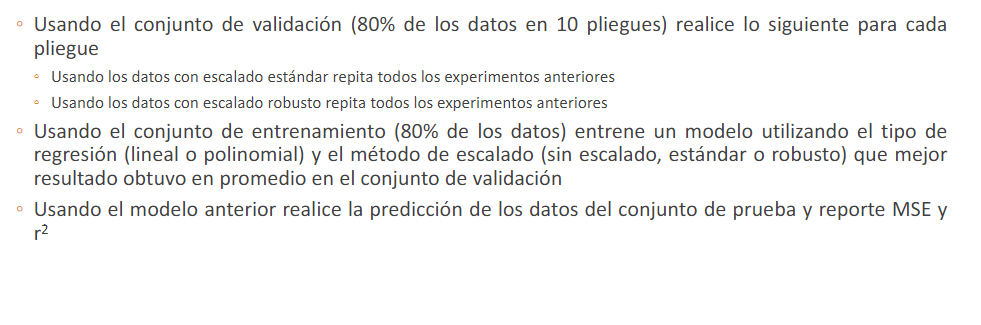

## Regresion Polinomial

## Pliegues

In [112]:
pd.options.display.max_colwidth = 200
dfPliegues = pd.read_csv("C:/Users/Angel/OneDrive/Documents/Programa 1erCorte/Data_Validation_Train_Pliegues10.csv", sep=',', engine='python')
XPligues = dfPliegues.values
dfTargetPliegues =  pd.read_csv("C:/Users/Angel/OneDrive/Documents/Programa 1erCorte/Validacion train/target_Validation_train10.csv", sep=',', engine='python')
yPliegues=dfTargetPliegues.values


### Escalar

In [113]:
# ~ # Modelo de regresión polinomial grado 3
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(XPligues)
model_poly = LinearRegression()
model_poly.fit(x_poly, yPliegues)
y_poly_pred = model_poly.predict(x_poly)

In [114]:
####Escalado de los datos####
# ~ #Standard Scaler
x_poly_standard_scaler = preprocessing.StandardScaler().fit_transform(x_poly)
print (x_poly_standard_scaler)
model_poly.fit(x_poly_standard_scaler, yPliegues)
y_poly_pred = model_poly.predict(x_poly_standard_scaler)

[[ 0.         -1.7263522   1.30722947 ... -0.28343851 -0.01836786
   1.83765189]
 [ 0.         -1.72090498  1.29742558 ...  1.76964553  4.90543033
   1.81835267]
 [ 0.         -1.73179942  1.29252363 ... -0.26503236  0.02329141
   1.07591558]
 ...
 [ 0.          1.07896587 -1.2564885  ... -0.07253292 -0.31923016
  -0.35504172]
 [ 0.          1.07896587 -1.26139045 ... -0.28879689 -0.57442614
  -0.3912122 ]
 [ 0.          1.07896587 -1.26139045 ... -0.2228106  -0.5326019
  -0.40050728]]


In [115]:
mse_listPlieguesEscalar=[]
r2_listPlieguesEscalar=[]

In [116]:
msePliegues = mean_squared_error(yPliegues, y_poly_pred)
r2Pliegues = r2_score(yPliegues, y_poly_pred)
mse_listPlieguesEscalar.append(msePliegues)
r2_listPlieguesEscalar.append(r2Pliegues)


In [117]:
print("Mse :",mse_listPlieguesEscalar)
print("R2:",r2_listPlieguesEscalar)

Mse : [3114919118.988549]
R2: [0.7526534240765291]


## Robusto 

In [118]:
mse_listPlieguesRobusto = []
r2_listPlieguesRobusto = []

In [119]:
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
model_poly.fit(x_poly_robust_scaler, yPliegues)
y_poly_pred = model_poly.predict(x_poly_robust_scaler)
msePR = mean_squared_error(yPliegues, y_poly_pred)
r2PR = r2_score(yPliegues, y_poly_pred)

mse_listPlieguesRobusto.append(msePR)
r2_listPlieguesRobusto.append(r2PR)

In [120]:
print("Mse :",mse_listPlieguesRobusto)
print("R2:",r2_listPlieguesRobusto)

Mse : [3114919118.9884367]
R2: [0.752653424076538]


# Modelo de entrenamiento Planteado por el Alumno

### Sin Escalar

In [122]:
mse_listModeloEntrenamiento = []
r2_listModeloEntrenamiento = []

In [123]:
# ~ # Modelo de regresión polinomial grado 3
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(x_poly, y_train)
y_poly_pred = model_poly.predict(x_poly)

In [125]:
mseSEscalado = mean_squared_error(y_train, y_poly_pred)
r2SEscalado = r2_score(y_train, y_poly_pred)
mse_listModeloEntrenamiento.append(mseSEscalado)
r2_listModeloEntrenamiento.append(r2SEscalado)

In [126]:
print("Mse :",mse_listPlieguesRobusto)
print("R2:",r2_listPlieguesRobusto)

Mse : [3114919118.9884367]
R2: [0.752653424076538]


### Escalado

In [127]:
mse_listModeloEntrenamientoEscalado = []
r2_listModeloEntrenamientoEscalado = []

In [128]:
# ~ #Standard Scaler
x_poly_standard_scaler = preprocessing.StandardScaler().fit_transform(x_poly)
print (x_poly_standard_scaler)
model_poly.fit(x_poly_standard_scaler, y_train)
y_poly_pred = model_poly.predict(x_poly_standard_scaler)

[[ 0.         -1.61169516  1.25839198 ... -0.28956238 -0.01682205
   1.86804984]
 [ 0.         -1.60649422  1.24880693 ...  1.79812456  5.03569715
   1.84848306]
 [ 0.         -1.6168961   1.2440144  ... -0.27084601  0.0259263
   1.09575302]
 ...
 [ 0.         -1.02918965  1.20088167 ... -0.18591934 -0.14626485
  -0.12967135]
 [ 0.         -1.05519436  1.1865041  ...  0.25112229  0.13623826
  -0.25817735]
 [ 0.         -1.10200283  1.20088167 ... -0.21332512 -0.3220869
  -0.26398544]]


In [130]:
mseEscalado = mean_squared_error(y_train, y_poly_pred)
r2Escalado = r2_score(y_train, y_poly_pred)
mse_listModeloEntrenamientoEscalado.append(mseEscalado)
r2_listModeloEntrenamientoEscalado.append(r2Escalado)

In [131]:
print("Mse :",mse_listModeloEntrenamientoEscalado)
print("R2:",r2_listModeloEntrenamientoEscalado)

Mse : [3286929577.555395]
R2: [0.744938661587026]


### Robusto 

In [132]:
mse_listModeloEntrenamientoRobusto = []
r2_listModeloEntrenamientoRobusto = []

In [133]:
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
model_poly.fit(x_poly_robust_scaler, y_train)
y_poly_pred = model_poly.predict(x_poly_robust_scaler)

In [135]:
mseRobusto = mean_squared_error(y_train, y_poly_pred)
r2Robusto = r2_score(y_train, y_poly_pred)
mse_listModeloEntrenamientoRobusto.append(mseRobusto)
r2_listModeloEntrenamientoRobusto.append(r2Robusto)

In [136]:
print("Mse :",mse_listModeloEntrenamientoRobusto)
print("R2:",r2_listModeloEntrenamientoRobusto)

Mse : [3286929577.5551662]
R2: [0.7449386615870438]
